In [1]:
from dredFISH.Analysis import TissueGraph
from dredFISH.Visualization import Viz
import matplotlib.pyplot as plt 
import numpy as np

import importlib
importlib.reload(Viz)
importlib.reload(TissueGraph)

<module 'dredFISH.Analysis.TissueGraph' from '/bigstore/GeneralStorage/fangming/projects/dredfish/packages/dredFISH/dredFISH/Analysis/TissueGraph.py'>

#### Load data

In [2]:
basepth = '/bigstore/GeneralStorage/Data/dredFISH/Dataset1'
!ls -alhtr $basepth
!head $basepth"/TMG.json"

total 81M
-rw-r--r-- 1 zach     wollmanlab  16M Jun  9 14:55 DPNMF_PolyA_2021Nov19_Section_-1850X_270Y_matrix.csv
-rw-r--r-- 1 zach     wollmanlab  20M Jun  9 14:55 DPNMF_PolyA_2021Nov19_Section_-1850X_270Y_metadata.csv
drwxrwxr-x 2 rwollman wollmanlab 4.0K Jul  7 12:18 .
-rw-rw-r-- 1 rwollman wollmanlab  165 Jul  7 16:00 TMG.json
-rw-r--r-- 1 fangming wollmanlab  40M Jul  7 16:00 cell.h5ad
-rw-r--r-- 1 fangming wollmanlab 6.8M Jul  7 16:00 isozone.h5ad
-rw-rw-r-- 1 rwollman wollmanlab 647K Jul  7 16:00 region.h5ad
-rw-r--r-- 1 fangming wollmanlab    3 Jul  7 16:00 Taxonomy_clusters.csv
-rw-r--r-- 1 fangming wollmanlab    3 Jul  7 16:00 Taxonomy_topics.csv
drwxrwxrwx 7 zach     wollmanlab 4.0K Jul  8 12:44 ..
{"layers_graph": [[0, 1], [0, 2]], "layer_taxonomy_mapping": {"0": 0, "1": 0, "2": 1}, "Taxonomies": ["clusters", "topics"], "Layers": ["cell", "isozone", "region"]}

In [3]:
TMG = TissueGraph.TissueMultiGraph(basepath=basepth, 
                                   redo=False, # load existing 
                                  )
TMG

/bigstore/GeneralStorage/Data/dredFISH/Dataset1/cell.h5ad
/bigstore/GeneralStorage/Data/dredFISH/Dataset1/isozone.h5ad
/bigstore/GeneralStorage/Data/dredFISH/Dataset1/region.h5ad


In [8]:
# spatial coordinates
XY = TMG.Layers[0].XY
X, Y = XY[:,0], XY[:,1]

# measured basis
PNMF = TMG.Layers[0].feature_mat

# types

# regions

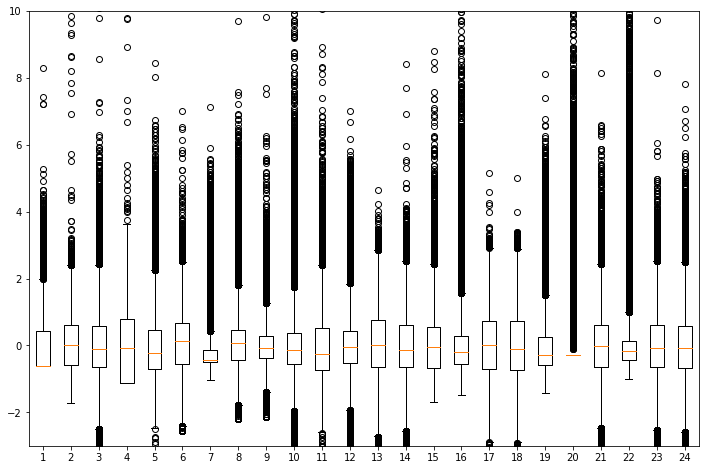

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(PNMF);
ax.set_ylim([-3,10])
plt.show()

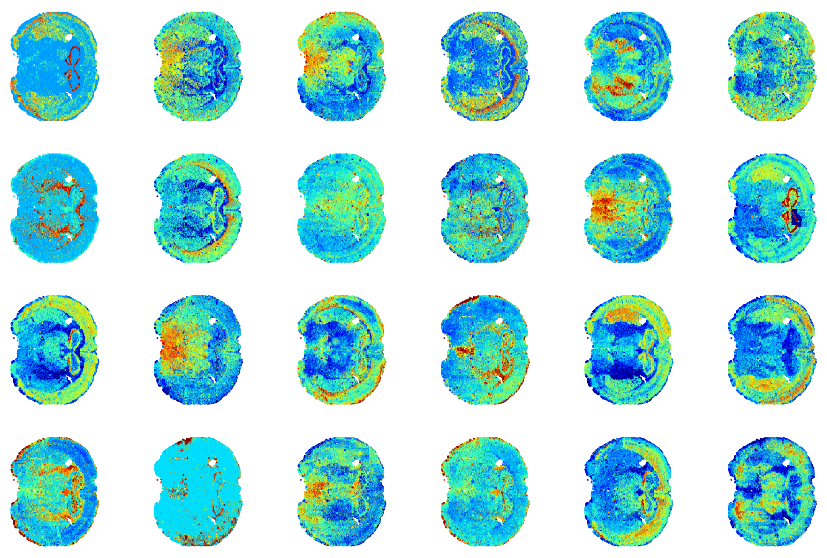

CPU times: user 24.4 s, sys: 47.6 ms, total: 24.4 s
Wall time: 24.4 s


In [16]:
%%time
fig, axs = plt.subplots(4, 6, figsize=(15,10))
for i in range(24):
    ax = axs.flat[i]
    ax.scatter(X, Y, c=PNMF[:,i], s=0.5, cmap='jet', vmin=-2, vmax=3)
    ax.set_aspect('equal')
    ax.axis('off')
plt.show()
    